# INSERTION SORT




In [1]:
#insertion sort

list = [10,25,8,90,22,59,74,94,11,14,20,18]
# list = [90,22,59]
comparisons=0
def insertionsort(list,comparisons):
    for x in range(1,len(list)):
        for y in range(x,0,-1):
            comparisons+=1
            print(list[y],list[y-1])
            if list[y]<list[y-1]:
                print("swap:",list[y],list[y-1])
                temp=list[y-1]
                list[y-1]=list[y]
                list[y]=temp
    
    return list,comparisons

#where index of val greater than target index
# def insert(list,indexofval,targetindex):
#     if indexofval>targetindex:
#         list_a=list[:targetindex]
#         list_b=list[targetindex:indexofval]
#         list_c=list[indexofval+1:]
#         final_list=list_a+[list[indexofval]]+list_b+list_c
#         return final_list

def insertionsortNoComparisons(list):
    for x in range(1,len(list)):
        for y in range(0,x):
            if list[x]<list[y]:
                list=insert(list,x,y)
    
    return list

print(insertionsort(list,0))
 

25 10
8 25
swap: 8 25
8 10
swap: 8 10
90 25
25 10
10 8
22 90
swap: 22 90
22 25
swap: 22 25
22 10
10 8
59 90
swap: 59 90
59 25
25 22
22 10
10 8
74 90
swap: 74 90
74 59
59 25
25 22
22 10
10 8
94 90
90 74
74 59
59 25
25 22
22 10
10 8
11 94
swap: 11 94
11 90
swap: 11 90
11 74
swap: 11 74
11 59
swap: 11 59
11 25
swap: 11 25
11 22
swap: 11 22
11 10
10 8
14 94
swap: 14 94
14 90
swap: 14 90
14 74
swap: 14 74
14 59
swap: 14 59
14 25
swap: 14 25
14 22
swap: 14 22
14 11
11 10
10 8
20 94
swap: 20 94
20 90
swap: 20 90
20 74
swap: 20 74
20 59
swap: 20 59
20 25
swap: 20 25
20 22
swap: 20 22
20 14
14 11
11 10
10 8
18 94
swap: 18 94
18 90
swap: 18 90
18 74
swap: 18 74
18 59
swap: 18 59
18 25
swap: 18 25
18 22
swap: 18 22
18 20
swap: 18 20
18 14
14 11
11 10
10 8
([8, 10, 11, 14, 18, 20, 22, 25, 59, 74, 90, 94], 66)


# MERGE SORT

# MERGE SORT

In [9]:
def mergesort(list,comparisons):
    mid=len(list)//2
    if mid==0:
        return list,comparisons
  
    first_list=list[:mid]
    second_list=list[mid:]

    a,comparisons_a=mergesort(first_list,0)
    b,comparisons_b=mergesort(second_list,0)
    comparisons=comparisons_a+comparisons_b+comparisons
    list,comparisons=merge(a,b,comparisons)

    return list,comparisons

def merge(list_1,list_2,comparisons):
    x=0
    y=0
   
    final_list=[]
    while x < len(list_1) and y <len(list_2):
        comparisons+=1
        if list_1[x]<list_2[y]:
            final_list+=[list_1[x]]
            x+=1
        else:
            final_list+=[list_2[y]]
            y+=1
    

    while y <len(list_2):
        final_list+=[list_2[y]]
        y+=1

    while x <len(list_1):
        final_list+=[list_1[x]]
        x+=1

    return final_list,comparisons

print(mergesort([2,4,3,1,5,9,6,20,50,10],0))

def mergesortNoComparisons(list):
    mid=len(list)//2
    if mid==0:
        return list
  
    first_list=list[:mid]
    second_list=list[mid:]

    a=mergesort(first_list)
    b=mergesort(second_list)
    list=mergeNoComparisons(a,b)

    return list

def mergeNoComparisons(list_1,list_2):
    x=0
    y=0
   
    final_list=[]
    while x < len(list_1) and y <len(list_2):
        if list_1[x]<list_2[y]:
            final_list+=[list_1[x]]
            x+=1
        else:
            final_list+=[list_2[y]]
            y+=1
    

    while y <len(list_2):
        final_list+=[list_2[y]]
        y+=1

    while x <len(list_1):
        final_list+=[list_1[x]]
        x+=1

    return final_list

([1, 2, 3, 4, 5, 6, 9, 10, 20, 50], 19)


# HYBRID SORT

In [6]:

import numpy as np

def hybridsortNoComparisons(list,S):
    mid=len(list)//2
    if mid==0:
        return list,S
    first_list=list[:mid]
    second_list=list[mid:]
    if len(list)>S:
        a,S=hybridsortNoComparisons(first_list,S)
        b,S=hybridsortNoComparisons(second_list,S)
    else:
        a=insertionsortNoComparisons(first_list,0)
        b=insertionsortNoComparisons(second_list,0)
    list=merge(a,b)   

    return list,S

def hybridsort(list,S,comparisons):
    mid=len(list)//2
    if mid==0:
        return list,S,comparisons
    first_list=list[:mid]
    second_list=list[mid:]
    if len(list)>S:
        a,S,comparisons_a=hybridsort(first_list,S,0)
        b,S,comparisons_b=hybridsort(second_list,S,0)
    else:
        a,comparisons_a=insertionsort(first_list,0)
        b,comparisons_b=insertionsort(second_list,0)
    comparisons=comparisons_a+comparisons_b+comparisons
   
    list,comparisons=merge(a,b,comparisons)   
    print("comparisons:",comparisons)

    return list,S,comparisons

def merge(list_1,list_2,comparisons):
    x=0
    y=0
    print("merge:",list_1,list_2)
    final_list=[]
    while x < len(list_1) and y <len(list_2):
        comparisons+=1
        if list_1[x]<list_2[y]:
            final_list+=[list_1[x]]
            x+=1
        else:
            final_list+=[list_2[y]]
            y+=1
    

    while y <len(list_2):
        final_list+=[list_2[y]]
        y+=1

    while x <len(list_1):
        final_list+=[list_1[x]]
        x+=1
    print("final_list:",final_list)
    return final_list,comparisons



arr=np.random.randint(30, size=100)

print(hybridsort( [10,25,8,90,22,59,74,94,11,14,20,18],4,0))


8 25
swap: 8 25
merge: [10] [8, 25]
final_list: [8, 10, 25]
comparisons: 3
59 22
merge: [90] [22, 59]
final_list: [22, 59, 90]
comparisons: 3
merge: [8, 10, 25] [22, 59, 90]
final_list: [8, 10, 22, 25, 59, 90]
comparisons: 10
11 94
swap: 11 94
merge: [74] [11, 94]
final_list: [11, 74, 94]
comparisons: 3
18 20
swap: 18 20
merge: [14] [18, 20]
final_list: [14, 18, 20]
comparisons: 2
merge: [11, 74, 94] [14, 18, 20]
final_list: [11, 14, 18, 20, 74, 94]
comparisons: 9
merge: [8, 10, 22, 25, 59, 90] [11, 14, 18, 20, 74, 94]
final_list: [8, 10, 11, 14, 18, 20, 22, 25, 59, 74, 90, 94]
comparisons: 30
([8, 10, 11, 14, 18, 20, 22, 25, 59, 74, 90, 94], 4, 30)


# TIME COMPLEXITY
Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, ..., x], where x is the largest number you allow for your
datasets.

In [4]:
import time
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(22)
arr=np.random.randint(10000000, size=10000000)

s_main=[]
t_main=[]
for size in [500,1000,5000]:
    time_arr=[]
    size_arr=[]
    comp_arr=[]
    s_arr=[]
    arr=np.random.randint(1000, size=size)
    for S in range(1000):
        start_time = time.time()
        arr,ignore,comparisons = hybridsort(arr,S,0)
        s_arr+=[S]
        end_time = (time.time() - start_time)
        time_arr+=[end_time]
        comp_arr+=[comparisons]
        
    # f = plt.figure(figsize=(20,20))
    # ax = f.add_subplot(211)
    # ax.plot(s_arr, time_arr,label= str(size) )
    # ax.set_xlabel("Threshold Value S")
    # ax.set_ylabel("Time (s)")
    s_main+=[s_arr]
    t_main+=[time_arr]

f = plt.figure(figsize=(20,20))   
plt.plot(s_main[0],t_main[0],s_main[1],t_main[1],s_main[2],t_main[2])


plt.show()


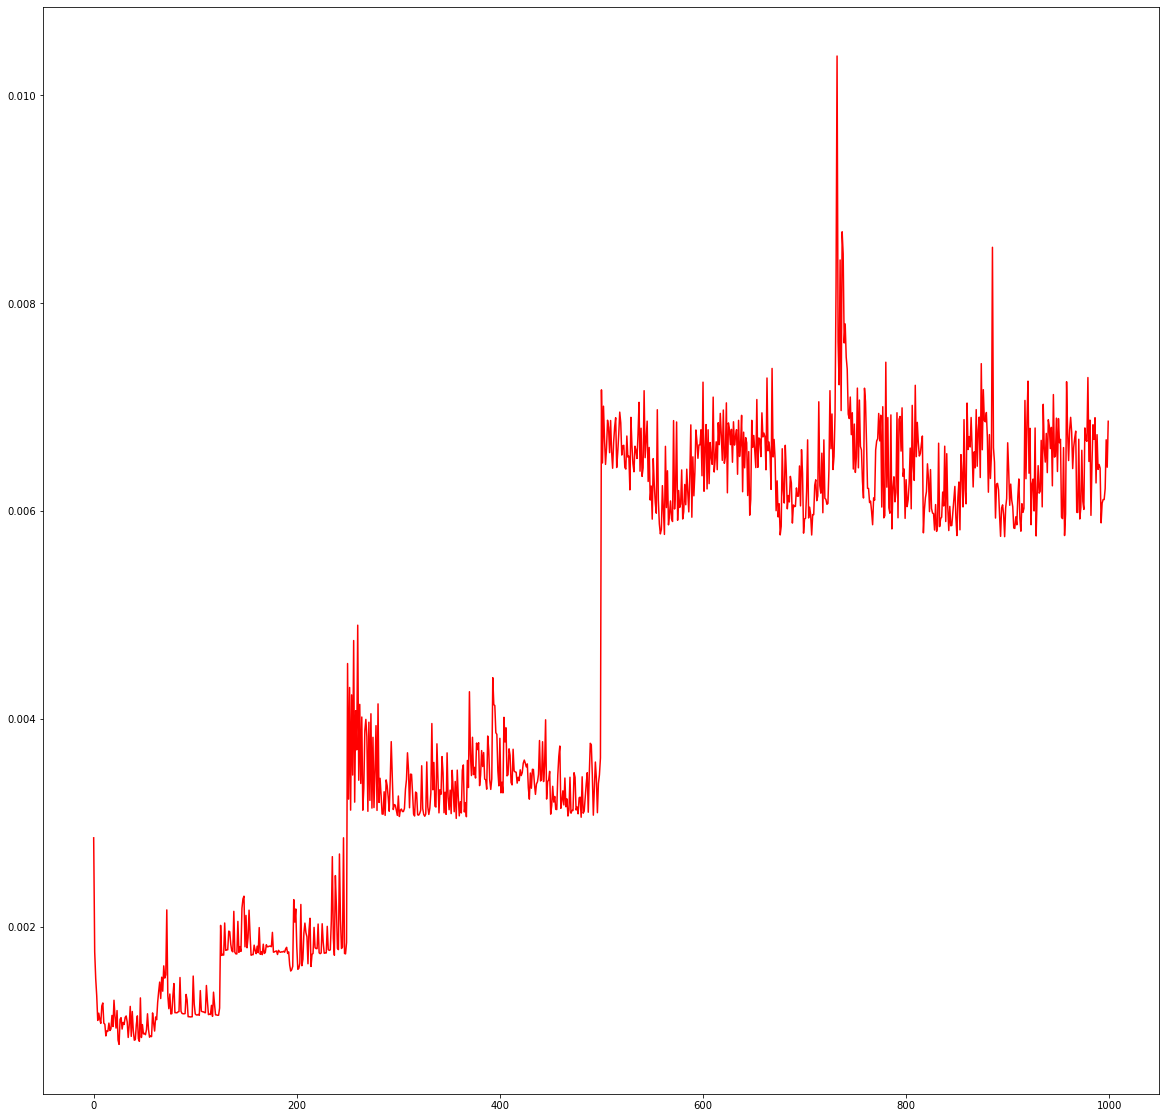

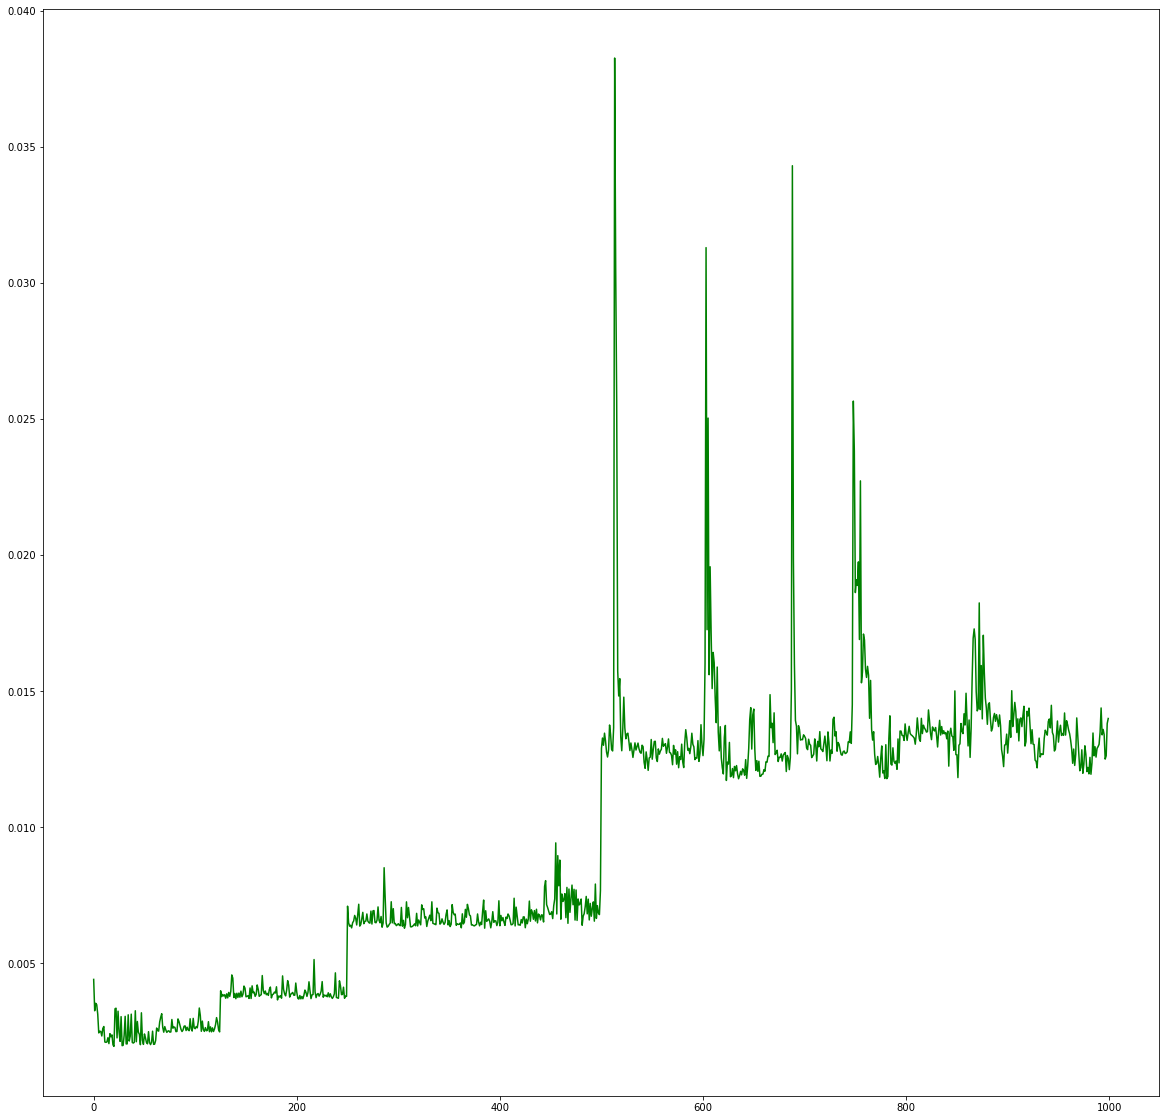

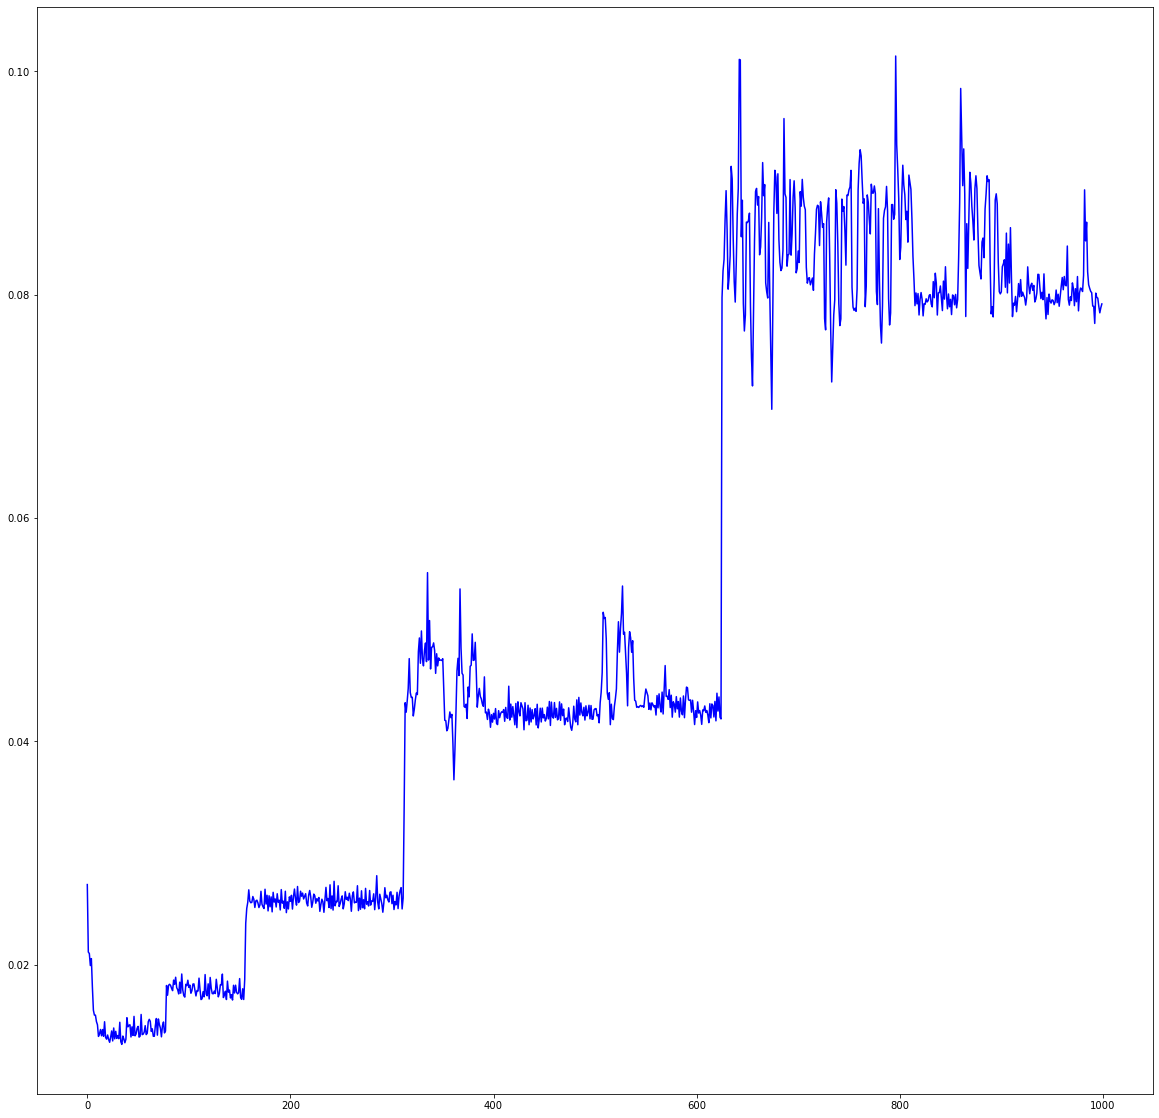

In [ ]:


color=['r','g','b']
x=0
for size in [500,1000,5000]:
    
    time_arr=[]
    size_arr=[]
    comp_arr=[]
    s_arr=[]
    arr=np.random.randint(1000, size=size)
    for S in range(1000):
        start_time = time.time()
        arr,ignore,comparisons = hybridsort(arr,S,0)
        s_arr+=[S]
        end_time = (time.time() - start_time)
        time_arr+=[end_time]
        comp_arr+=[comparisons]
        
    f = plt.figure(figsize=(20,20))
    # ax = f.add_subplot(211)
    # ax.plot(s_arr, time_arr,label= str(size) )
    # ax.set_xlabel("Threshold Value S")
    # ax.set_ylabel("Time (s)")
 
    plt.plot(s_arr, time_arr,color[x])
    x+=1
    

plt.show()

# plt.plot(t, a, 'r') # plotting t, a separately 
# plt.plot(t, b, 'b') # plotting t, b separately 
# plt.plot(t, c, 'g') # plotting t, c separately 
# plt.show()

In [ ]:
np.random.seed(42)
arr = np.random.rand(1048576)
start_time = time.time()
sortedArr, comparisons = hybridsort(arr, 7)
end_time = (time.time() - start_time)
print(end_time, comparisons)

np.random.seed(42)
arr = np.random.rand(1048576)
start_time = time.time()
sortedArr, comparisons = mergesort(arr)
end_time = (time.time() - start_time)
print(end_time, comparisons)


NameError: name 'np' is not defined